In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('cardioActivities.csv')

In [4]:
data.head()

,Date,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,NaN,10.44,58:40,5:37,10.68,774.0,130,159.0,NaN,NaN,2018-11-11-140512.gpx
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,NaN,12.84,1:14:12,5:47,10.39,954.0,168,159.0,NaN,NaN,2018-11-09-150235.gpx
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,NaN,13.01,1:15:16,5:47,10.37,967.0,171,155.0,NaN,NaN,2018-11-04-160500.gpx
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,NaN,12.98,1:14:25,5:44,10.47,960.0,169,158.0,NaN,NaN,2018-11-01-140358.gpx
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,NaN,13.02,1:12:50,5:36,10.73,967.0,170,154.0,NaN,NaN,2018-10-27-170136.gpx


## working with missing values

In [5]:
data.isna().sum()*100/data.shape[0]

Date                          0.000000
Activity Id                   0.000000
Type                          0.000000
Route Name                   99.803150
Distance (km)                 0.000000
Duration                      0.000000
Average Pace                  0.000000
Average Speed (km/h)          0.000000
Calories Burned               0.000000
Climb (m)                     0.000000
Average Heart Rate (bpm)     42.125984
Friend's Tagged             100.000000
Notes                        54.527559
GPX File                      0.787402
dtype: float64

columns that have more than 40% missing data will not be useful for analysis. I will therefore drop them. I will also drop GPX File because it contains the same data as Date. Dropping pace because it has similar meaning to speed

In [6]:
data.drop(['Route Name', 'Average Heart Rate (bpm)', "Friend's Tagged", "Notes", "GPX File", "Average Pace"], axis=1, inplace=True)

In [7]:
data.isna().sum()

Date                    0
Activity Id             0
Type                    0
Distance (km)           0
Duration                0
Average Speed (km/h)    0
Calories Burned         0
Climb (m)               0
dtype: int64

In [8]:
data.head()

,Date,Activity Id,Type,Distance (km),Duration,Average Speed (km/h),Calories Burned,Climb (m)
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,58:40,10.68,774.0,130
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,1:14:12,10.39,954.0,168
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,13.01,1:15:16,10.37,967.0,171
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,12.98,1:14:25,10.47,960.0,169
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,13.02,1:12:50,10.73,967.0,170


## working with data types

In [9]:
data.dtypes

Date                     object
Activity Id              object
Type                     object
Distance (km)           float64
Duration                 object
Average Speed (km/h)    float64
Calories Burned         float64
Climb (m)                 int64
dtype: object

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.dtypes

Date                    datetime64[ns]
Activity Id                     object
Type                            object
Distance (km)                  float64
Duration                        object
Average Speed (km/h)           float64
Calories Burned                float64
Climb (m)                        int64
dtype: object

## working with units

In [12]:
def convert_duration_to_seconds(duration):
    duration_list = duration.split(':')
    n = len(duration_list)
    if n==1:
        return float(duration_list[0])
    elif n==2:
        return 60.0*float(duration_list[0]) + float(duration_list[1])
    elif n==3:
        return 60.0*60.0*float(duration_list[0]) + 60.0*float(duration_list[1]) + float(duration_list[1])

In [13]:
data['duration(s)'] = data['Duration'].apply(convert_duration_to_seconds)
del data['Duration']

In [14]:
data.head()

,Date,Activity Id,Type,Distance (km),Average Speed (km/h),Calories Burned,Climb (m),duration(s)
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,10.44,10.68,774.0,130,3520.0
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,12.84,10.39,954.0,168,4454.0
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,13.01,10.37,967.0,171,4515.0
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,12.98,10.47,960.0,169,4454.0
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,13.02,10.73,967.0,170,4332.0


converting distance to meters and speed to m/s

In [15]:
data['distance(m)'] = data['Distance (km)']*1000
data['speed(m/s)'] = data['Average Speed (km/h)']*(1000/(60*60))
data.drop(['Distance (km)', 'Average Speed (km/h)'], axis=1, inplace=True)

## working with column titles

In [16]:
data.columns = [col.lower() for col in data.columns]

In [17]:
data.head()

,date,activity id,type,calories burned,climb (m),duration(s),distance(m),speed(m/s)
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,774.0,130,3520.0,10440.0,2.966667
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,954.0,168,4454.0,12840.0,2.886111
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,967.0,171,4515.0,13010.0,2.880556
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,960.0,169,4454.0,12980.0,2.908333
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,967.0,170,4332.0,13020.0,2.980556


## working with outliers

In [18]:
data['calories burned'].describe()

count    5.080000e+02
mean     1.878197e+04
std      2.186930e+05
min      4.000000e+01
25%      4.917500e+02
50%      7.280884e+02
75%      9.212500e+02
max      4.072685e+06
Name: calories burned, dtype: float64

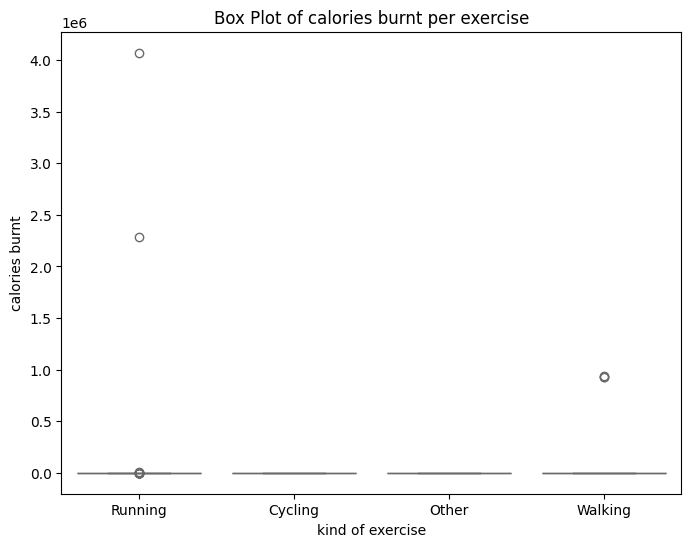

In [19]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="calories burned", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('calories burnt')
plt.title('Box Plot of calories burnt per exercise')

# Show the plot
plt.show();

eliminate the outliers

In [20]:
data = data[data['calories burned']<1500]
data = data[~((data['calories burned']>100)&(data['type']=='Walking'))]

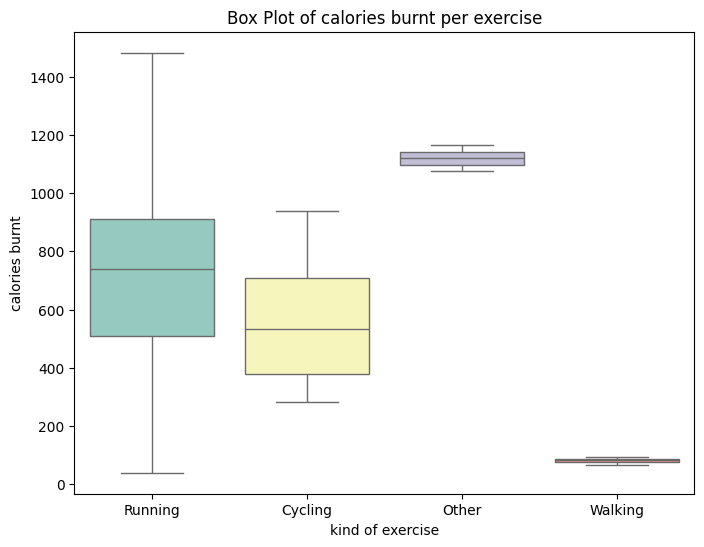

In [21]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="calories burned", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('calories burnt')
plt.title('Box Plot of calories burnt per exercise')

# Show the plot
plt.show();

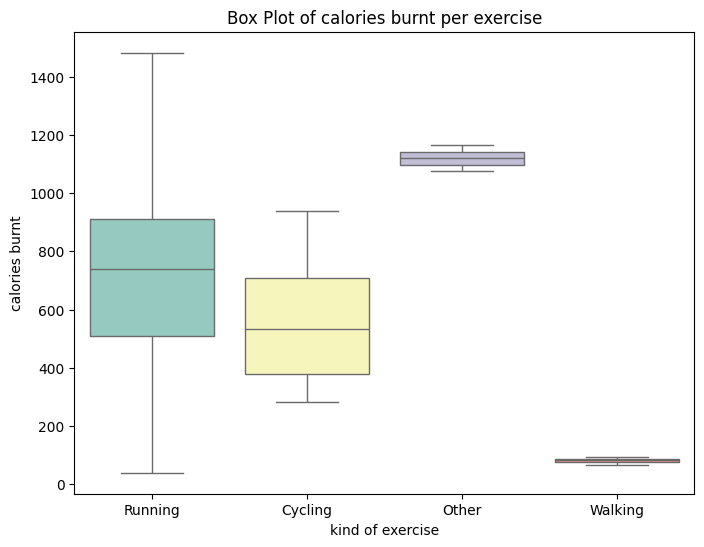

In [22]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="calories burned", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('calories burnt')
plt.title('Box Plot of calories burnt per exercise')

# Show the plot
plt.show();

In [23]:
data.head()

,date,activity id,type,calories burned,climb (m),duration(s),distance(m),speed(m/s)
0,2018-11-11 14:05:12,c9627fed-14ac-47a2-bed3-2a2630c63c15,Running,774.0,130,3520.0,10440.0,2.966667
1,2018-11-09 15:02:35,be65818d-a801-4847-a43b-2acdf4dc70e7,Running,954.0,168,4454.0,12840.0,2.886111
2,2018-11-04 16:05:00,c09b2f92-f855-497c-b624-c196b3ef036c,Running,967.0,171,4515.0,13010.0,2.880556
3,2018-11-01 14:03:58,bc9b612d-3499-43ff-b82a-9b17b71b8a36,Running,960.0,169,4454.0,12980.0,2.908333
4,2018-10-27 17:01:36,972567b2-1b0e-437c-9e82-fef8078d6438,Running,967.0,170,4332.0,13020.0,2.980556


In [24]:
data['duration(s)'].describe()

count     479.000000
mean     3544.659708
std      1485.673917
min       315.000000
25%      2443.500000
50%      3566.000000
75%      4210.000000
max      9762.000000
Name: duration(s), dtype: float64

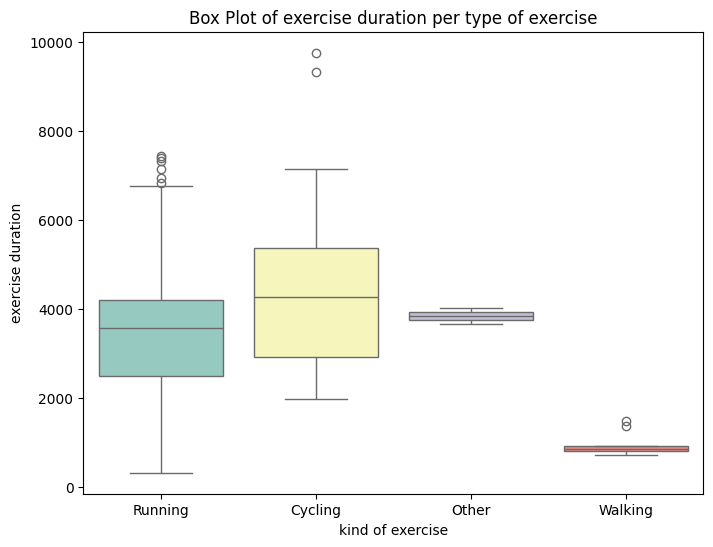

In [25]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="duration(s)", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('exercise duration')
plt.title('Box Plot of exercise duration per type of exercise')

# Show the plot
plt.show();

In [26]:
data = data[data['duration(s)']<6000]
data = data[~((data['duration(s)']>1100)&(data['type']=='Walking'))]

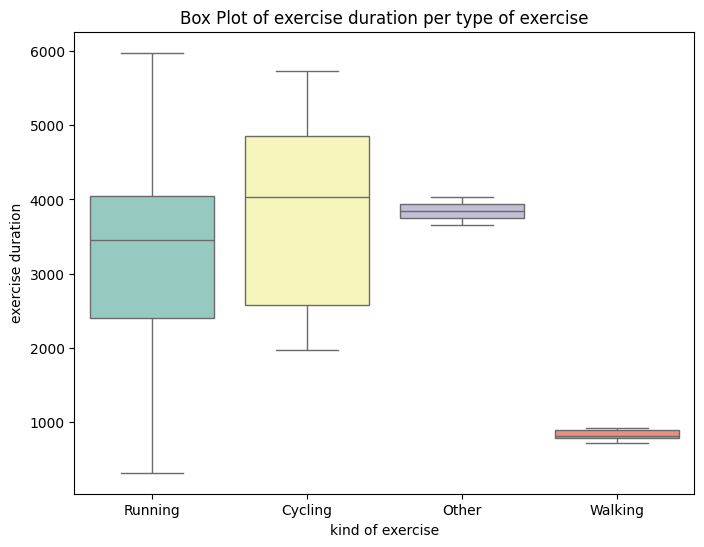

In [27]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="duration(s)", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('exercise duration')
plt.title('Box Plot of exercise duration per type of exercise')

# Show the plot
plt.show();

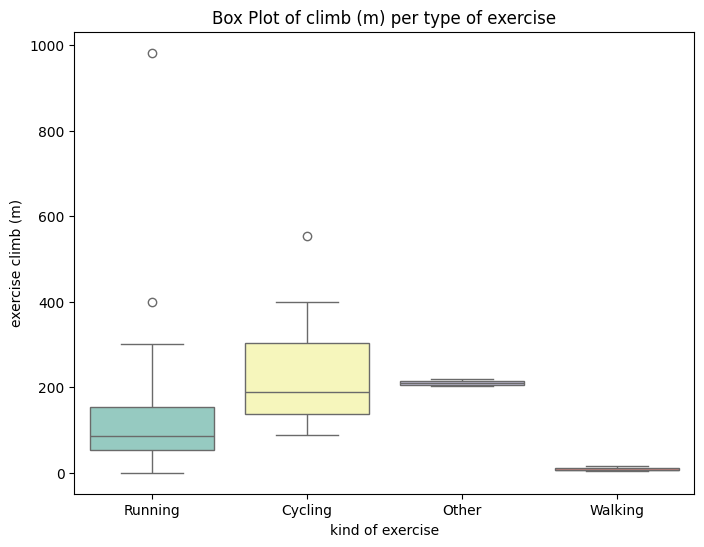

In [28]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="climb (m)", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('exercise climb (m)')
plt.title('Box Plot of climb (m) per type of exercise')

# Show the plot
plt.show();

In [29]:
data = data[data['climb (m)']<350]
data = data[~((data['climb (m)']>290)&(data['type']=='Running'))]

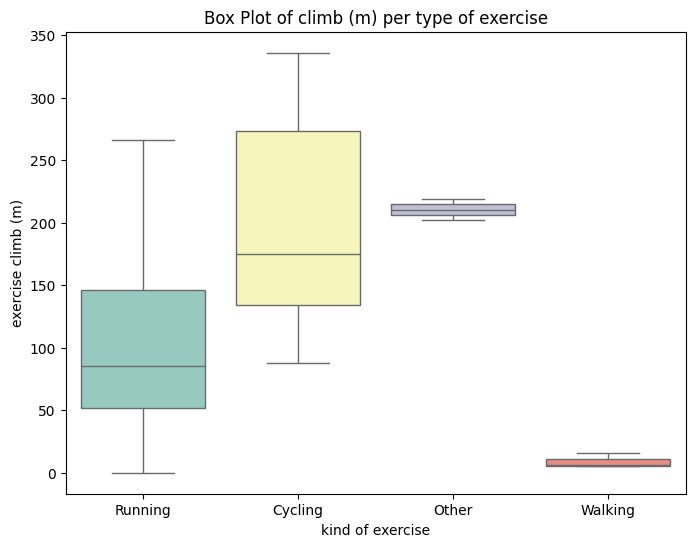

In [30]:
# Create a box plot using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x="type", y="climb (m)", data=data, palette="Set3", hue='type')

# Add labels and title
plt.xlabel('kind of exercise')
plt.ylabel('exercise climb (m)')
plt.title('Box Plot of climb (m) per type of exercise')

# Show the plot
plt.show();

I will remove data where type is other and walking because they have few data points. This is not useful in analysis

In [31]:
data[data['type']=='Other'].shape

(2, 8)

In [32]:
data = data[~((data['type']=='Other') | (data['type']=='Walking'))]

In [33]:
data.to_csv('clean_cardio_activities.csv', index=False)